Loading the Dataset


In [3]:
#Mount Gooogle Drive (Location of Dataset)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Read in CAV Cybersecurity
import pandas as pd
from pandas import read_excel
df = read_excel('/content/drive/My Drive/CAV-KDD.xlsx')
print(df.head())

   duration protocol_type  ... dst_host_srv_rerror_rate attack_label
0         0           udp  ...                      0.0      normal.
1         0           udp  ...                      0.0      normal.
2         0           udp  ...                      0.0      normal.
3         0           udp  ...                      0.0      normal.
4         0           udp  ...                      0.0      normal.

[5 rows x 42 columns]


# Label Encoding



In [5]:
print(df.iloc[1500])
print(df.iloc[1])
print(df.iloc[171000])

duration                            0
protocol_type                    icmp
service                         ecr_i
flag                               SF
src_bytes                        1032
dst_bytes                           0
land                                0
wrong_fragment                      0
urgent                              0
hot                                 0
num_failed_logins                   0
logged_in                           0
num_compromised                     0
root_shell                          0
su_attempted                        0
num_root                            0
num_file_creations                  0
num_shells                          0
num_access_files                    0
num_outbound_cmds                   0
is_host_login                       0
is_guest_login                      0
count                             509
srv_count                         509
serror_rate                         0
srv_serror_rate                     0
rerror_rate 

In [6]:
cat_features=['protocol_type', 'service', 'flag']

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in cat_features:
    if col in df.columns:
        i = df.columns.get_loc(col)
        df.iloc[:,i] = df.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [7]:
print(df.iloc[1500])
print(df.iloc[1])
print(df.iloc[171000])

duration                            0
protocol_type                       0
service                            14
flag                                9
src_bytes                        1032
dst_bytes                           0
land                                0
wrong_fragment                      0
urgent                              0
hot                                 0
num_failed_logins                   0
logged_in                           0
num_compromised                     0
root_shell                          0
su_attempted                        0
num_root                            0
num_file_creations                  0
num_shells                          0
num_access_files                    0
num_outbound_cmds                   0
is_host_login                       0
is_guest_login                      0
count                             509
srv_count                         509
serror_rate                         0
srv_serror_rate                     0
rerror_rate 

# Feature Selection


Feature: 0, Score: 0.00462
Feature: 1, Score: 0.08467
Feature: 2, Score: 0.07350
Feature: 3, Score: 0.03554
Feature: 4, Score: 0.09415
Feature: 5, Score: 0.02519
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00192
Feature: 8, Score: 0.00001
Feature: 9, Score: 0.00007
Feature: 10, Score: 0.00125
Feature: 11, Score: 0.01303
Feature: 12, Score: 0.00002
Feature: 13, Score: 0.00003
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00001
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00006
Feature: 22, Score: 0.14611
Feature: 23, Score: 0.11342
Feature: 24, Score: 0.00675
Feature: 25, Score: 0.00567
Feature: 26, Score: 0.00352
Feature: 27, Score: 0.00211
Feature: 28, Score: 0.07142
Feature: 29, Score: 0.06093
Feature: 30, Score: 0.00290
Feature: 31, Score: 0.00935
Feature: 32, Score: 0.04258
Feature: 33, Score: 0.03418
Feature: 34, Score: 0.02386
Feature: 35, Score: 0.10864
Fe

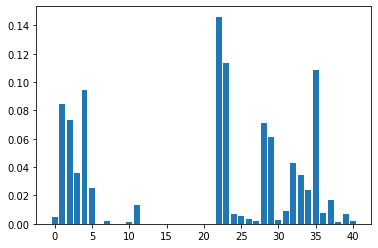

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [9]:
df = df[['protocol_type', 'service', 'flag', 'count','srv_count','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_same_src_port_rate', 'attack_label']].copy()


Separation of Dataset


In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.33)

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 200, num = 5)]
random_grid = {'n_estimators': n_estimators}
print(random_grid)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

{'n_estimators': [5, 53, 102, 151, 200]}
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  6.7min finished


{'n_estimators': 151}

In [52]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=False,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [14]:
from collections import Counter

counter = Counter(y_test)
print(counter)
counter_train  = Counter(y_train)
print(counter_train)

Counter({'smurf.': 146811, 'neptune.': 54517, 'normal.': 52097, 'mailbomb.': 1650, 'guess_passwd.': 1459, 'ipsweep.': 512, 'teardrop.': 327, 'pod.': 116, 'nmap.': 104, 'httptunnel.': 52, 'buffer_overflow.': 17, 'ftp_write.': 4, 'xsnoop.': 1, 'udpstorm.': 1, 'worm.': 1})
Counter({'smurf.': 298070, 'neptune.': 110685, 'normal.': 105774, 'mailbomb.': 3350, 'guess_passwd.': 2961, 'ipsweep.': 1041, 'teardrop.': 664, 'pod.': 235, 'nmap.': 211, 'httptunnel.': 106, 'buffer_overflow.': 35, 'ftp_write.': 7, 'xsnoop.': 3, 'udpstorm.': 1, 'worm.': 1})


None


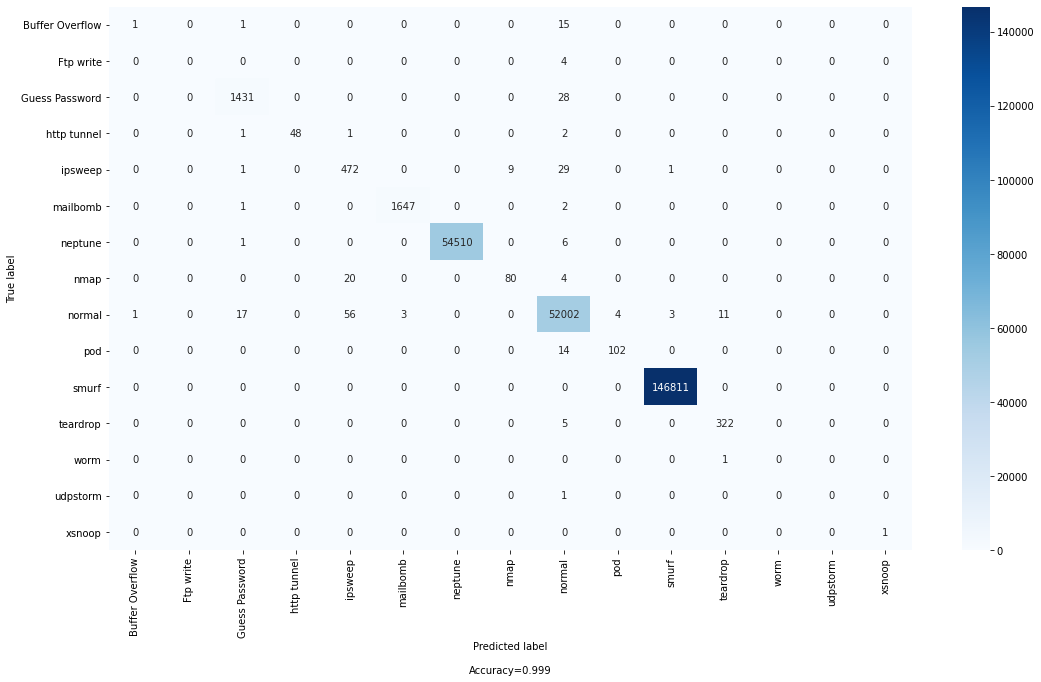

In [85]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cf = cm, categories=['Buffer Overflow', 'Ftp write', 'Guess Password', 'http tunnel', 'ipsweep', 'mailbomb', 'neptune', 'nmap', 'normal', 'pod', 'smurf' , 'teardrop', 'worm', 'udpstorm', 'xsnoop'] ,sum_stats = True, figsize = (18,10)))

In [86]:
#Metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, y_pred,  average='macro', zero_division=0)
print('Precision: %.3f' % precision)
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %.3f' % recall)
score = f1_score(y_test, y_pred, average='macro')
print('F-Measure: %.3f' % score)

Precision: 0.744
Recall: 0.701
F-Measure: 0.710


In [55]:
cf = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cf.diagonal())



[0.05882353 0.         0.98080877 0.92307692 0.921875   0.99818182
 0.9998716  0.76923077 0.99817648 0.87931034 1.         0.98470948
 0.         0.         1.        ]


In [56]:
buff = cf.diagonal()[0]
x = []
for i in range(0,15):
  x.append(cf.diagonal()[i])


print('Buffer Overflow: %.3f' % x[0])
print('FTP_Write %.3f' % x[1])
print('Guess Password: %.3f' % x[2])
print('http tunnel: %.3f' % x[3])
print('ipsweep: %.3f' % x[4])
print('mailbomb: %.3f' % x[5])
print('neptune: %.3f' % x[6])
print('nmap: %.3f' % x[7])
print('normal: %.3f' % x[8])
print('pod: %.3f' % x[9])
print('smurf: %.3f' % x[10])
print('teardrop: %.3f' % x[11])
print('worm: %.3f' % x[12])
print('udpstorm: %.3f' % x[13])
print('xsnoop: %.3f' % x[14])


Buffer Overflow: 0.059
FTP_Write 0.000
Guess Password: 0.981
http tunnel: 0.923
ipsweep: 0.922
mailbomb: 0.998
neptune: 1.000
nmap: 0.769
normal: 0.998
pod: 0.879
smurf: 1.000
teardrop: 0.985
worm: 0.000
udpstorm: 0.000
xsnoop: 1.000


In [18]:
from collections import Counter

counter = Counter(y_test)
print(counter)
counter_train  = Counter(y_train)
print(counter_train)

Counter({'smurf.': 146811, 'neptune.': 54517, 'normal.': 52097, 'mailbomb.': 1650, 'guess_passwd.': 1459, 'ipsweep.': 512, 'teardrop.': 327, 'pod.': 116, 'nmap.': 104, 'httptunnel.': 52, 'buffer_overflow.': 17, 'ftp_write.': 4, 'xsnoop.': 1, 'udpstorm.': 1, 'worm.': 1})
Counter({'smurf.': 298070, 'neptune.': 110685, 'normal.': 105774, 'mailbomb.': 3350, 'guess_passwd.': 2961, 'ipsweep.': 1041, 'teardrop.': 664, 'pod.': 235, 'nmap.': 211, 'httptunnel.': 106, 'buffer_overflow.': 35, 'ftp_write.': 7, 'xsnoop.': 3, 'udpstorm.': 1, 'worm.': 1})


In [97]:
from imblearn.over_sampling import SMOTE

#strategy = {0:50, 1: 20, 3: 150, 9:100, }
#oversample = SMOTE(sampling_strategy=strategy, k_neighbors=3)
from imblearn.over_sampling import RandomOverSampler 
strategy = { 'xsnoop.': 6, 'worm.': 6, 'udpstorm.': 6}
oversample = RandomOverSampler(sampling_strategy= strategy)
X_train_over, y_train_over= oversample.fit_resample(X_train, y_train)
strategy = {'nmap.': 60000, 'buffer_overflow.': 60000, 'ftp_write.': 60000, 'worm.': 90000, 'udpstorm.': 90000}
oversample = SMOTE(sampling_strategy= strategy, k_neighbors=4)
X_train_over, y_train_over= oversample.fit_resample(X_train_over, y_train_over)
#strategy_test = {'ipsweep.': 513, 'buffer_overflow.': 20, 'ftp_write.': 10, 'xsnoop.': 2, 'worm.': 2, 'udpstorm.': 2}
#oversample = RandomOverSampler(sampling_strategy= strategy_test)
#PRX_test_over, y_test_over= oversample.fit_resample(X_test, y_test)

print(Counter(y_train_over))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Counter({'smurf.': 298070, 'neptune.': 110685, 'normal.': 105774, 'worm.': 90000, 'udpstorm.': 90000, 'nmap.': 60000, 'buffer_overflow.': 60000, 'ftp_write.': 60000, 'mailbomb.': 3350, 'guess_passwd.': 2961, 'ipsweep.': 1041, 'teardrop.': 664, 'pod.': 235, 'httptunnel.': 106, 'xsnoop.': 6})


In [98]:
from sklearn.ensemble import RandomForestClassifier
classifier_over = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_over.fit(X_train_over, y_train_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

None


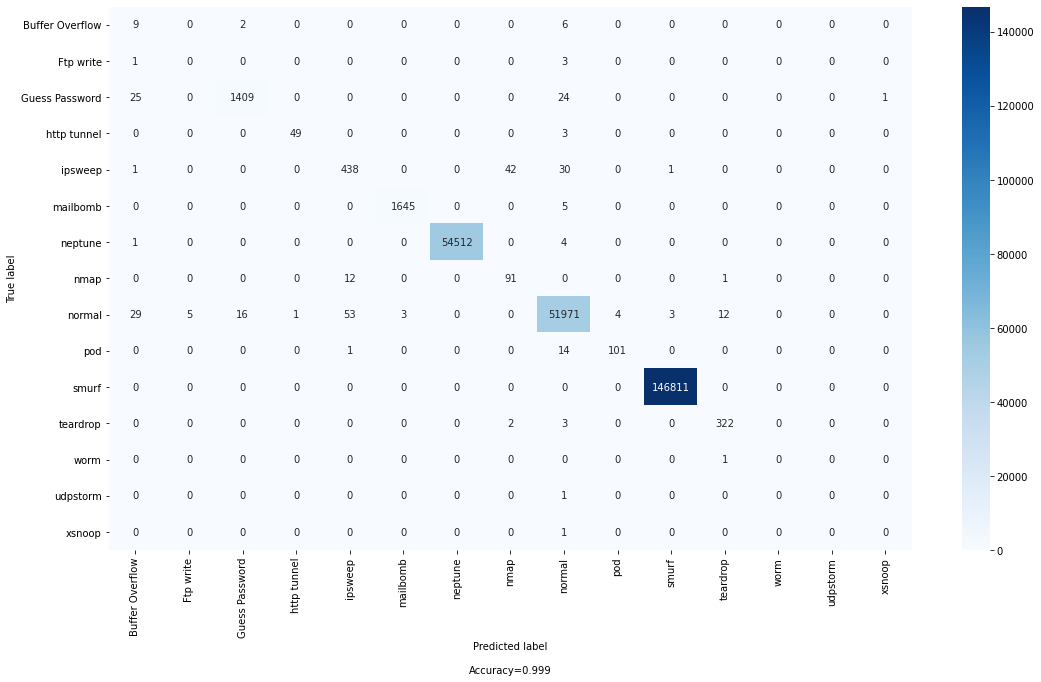

In [99]:
from sklearn.model_selection import cross_val_predict
y_pred_over_2 = classifier_over.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_over = confusion_matrix(y_test, y_pred_over_2)
print(make_confusion_matrix(cf = cm_over, categories=['Buffer Overflow', 'Ftp write', 'Guess Password', 'http tunnel', 'ipsweep', 'mailbomb', 'neptune', 'nmap', 'normal', 'pod', 'smurf' , 'teardrop', 'worm', 'udpstorm', 'xsnoop'] ,sum_stats = True, figsize = (18,10)))

In [ ]:
#Metrics
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
precision = precision_score(y_test, y_pred_over_2,  average='macro')
print('Precision: %.3f' % precision)
recall = recall_score(y_test, y_pred_over_2, average='macro')
print('Recall: %.3f' % recall)
score = f1_score(y_test, y_pred_over_2, average='macro')
print('F-Measure: %.3f' % score)


In [ ]:
cf_over= cm_over.astype('float') / cm_over.sum(axis=1)[:, np.newaxis]
print(cf_over.diagonal())
from sklearn.metrics import recall_score


In [ ]:
x = []
for i in range(0,15):
  x.append(cf_over.diagonal()[i])


print('Buffer Overflow: %.3f' % x[0])
print('FTP_Write %.3f' % x[1])
print('Guess Password: %.3f' % x[2])
print('http tunnel: %.3f' % x[3])
print('ipsweep: %.3f' % x[4])
print('mailbomb: %.3f' % x[5])
print('neptune: %.3f' % x[6])
print('nmap: %.3f' % x[7])
print('normal: %.3f' % x[8])
print('pod: %.3f' % x[9])
print('smurf: %.3f' % x[10])
print('teardrop: %.3f' % x[11])
print('worm: %.3f' % x[12])
print('udpstorm: %.3f' % x[13])
print('xsnoop: %.3f' % x[14])
